#PROPHET MODEL


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data.

Here We have applied Prophet model with monthly seasonality on Adilabad District univariate AQI data provided by NASSCOM.


In [1]:
## All necessary installations for the model to work
!pip install pystan~=2.14
!pip install fbprophet
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536760 sha256=b10bea6bf3de9345064b922af9088c0f33a8411826cb868288631eb578882255
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdstan

In [2]:
## Included all necessary Header files
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
import pandas as pd
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet

In [54]:
#Preprocessing the data

df = pd.read_excel("AQI1.xlsx")

df.index = pd.to_datetime(df["Month"])
df.drop(columns="Month",inplace=True)

df['Adilabad'] = pd.to_numeric(df['Adilabad'],errors='coerce')

# EDA

In [55]:
print(df.dtypes)
print(df.isna().sum())

Nizamabad              object
Adilabad              float64
Kuda, warangal          int64
Mee-Seva, Warangal      int64
Khammam                object
Karimnagar              int64
dtype: object
Nizamabad              0
Adilabad              13
Kuda, warangal         0
Mee-Seva, Warangal     0
Khammam                0
Karimnagar             0
dtype: int64


<AxesSubplot:xlabel='Month'>

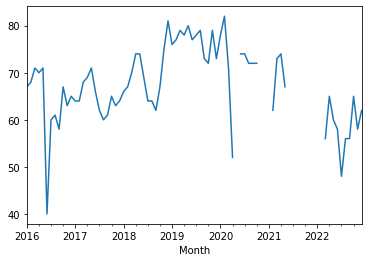

In [56]:
df["Adilabad"].plot()

In [57]:
df['Adilabad'] = df['Adilabad'].interpolate(method="time")

<AxesSubplot:xlabel='Month'>

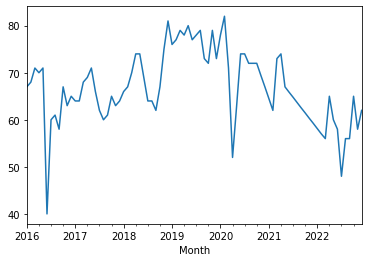

In [58]:
df["Adilabad"].plot()

# MODEL

In [59]:
dfKN = df[["Adilabad"]]
dfKN=dfKN.reset_index()
dfKN.rename(columns={'Month': 'ds', 'Adilabad': 'y'}, inplace=True)

In [60]:
# Applying Prophet model 
model = Prophet(seasonality_mode="multiplicative")
model.fit(dfKN)
model.component_modes
future_dates=model.make_future_dataframe(periods=12,freq='M')
prediction = model.predict(future_dates)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


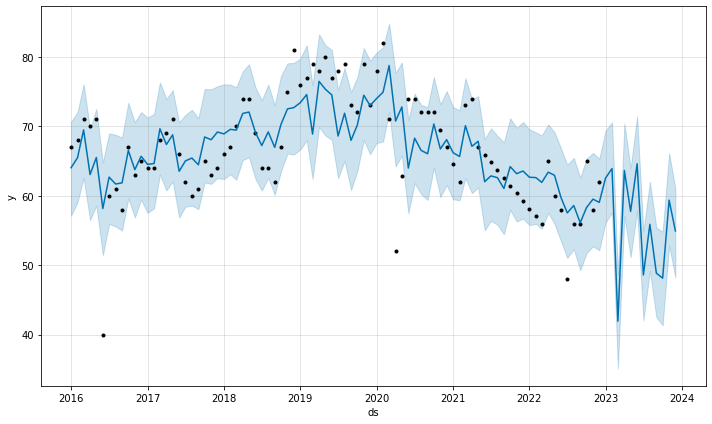

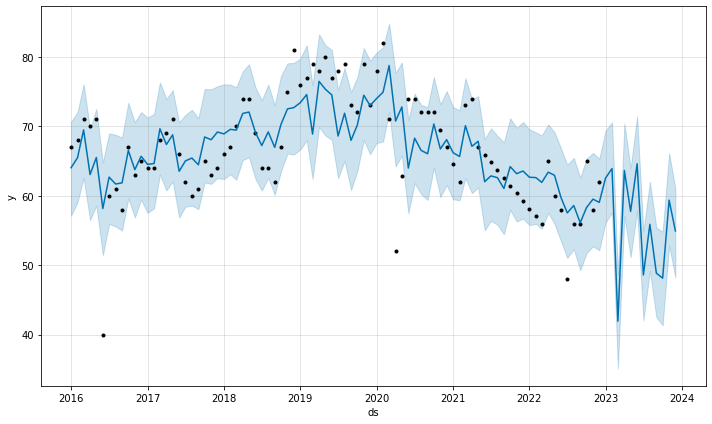

In [61]:
model.plot(prediction)

In [62]:
prediction.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
84,2022-12-31,59.625512,56.154562,69.377342,59.623920,59.627138,0.048944,0.048944,0.048944,0.048944,0.048944,0.048944,0.0,0.0,0.0,62.543810
85,2023-01-31,59.227532,57.534999,70.573812,59.200133,59.249309,0.079126,0.079126,0.079126,0.079126,0.079126,0.079126,0.0,0.0,0.0,63.913982
86,2023-02-28,58.868066,35.106613,48.668157,58.817443,58.917596,-0.287943,-0.287943,-0.287943,-0.287943,-0.287943,-0.287943,0.0,0.0,0.0,41.917413
87,2023-03-31,58.470085,57.073490,70.400366,58.372272,58.557006,0.088384,0.088384,0.088384,0.088384,0.088384,0.088384,0.0,0.0,0.0,63.637910
88,2023-04-30,58.084943,51.151035,63.992710,57.929743,58.210334,-0.005778,-0.005778,-0.005778,-0.005778,-0.005778,-0.005778,0.0,0.0,0.0,57.749312
89,2023-05-31,57.686962,57.870581,71.444612,57.470905,57.868992,0.119954,0.119954,0.119954,0.119954,0.119954,0.119954,0.0,0.0,0.0,64.606744
90,2023-06-30,57.301820,42.041874,54.861726,57.029768,57.531455,-0.151939,-0.151939,-0.151939,-0.151939,-0.151939,-0.151939,0.0,0.0,0.0,48.595450
91,2023-07-31,56.903840,49.163956,62.012940,56.571385,57.188864,-0.017938,-0.017938,-0.017938,-0.017938,-0.017938,-0.017938,0.0,0.0,0.0,55.883089
92,2023-08-31,56.505859,42.495455,55.420281,56.109074,56.864029,-0.135524,-0.135524,-0.135524,-0.135524,-0.135524,-0.135524,0.0,0.0,0.0,48.847947
93,2023-09-30,56.120717,41.340858,54.831930,55.655843,56.550638,-0.142324,-0.142324,-0.142324,-0.142324,-0.142324,-0.142324,0.0,0.0,0.0,48.133381


In [63]:
from pandas.tseries.offsets import DateOffset
pred_date=[df.index[-1]+ DateOffset(months=x)for x in range(1,13)]
pred_date=pd.DataFrame(index=pred_date,columns=df.columns)
data = pd.concat([df,pred_date])

<AxesSubplot:>

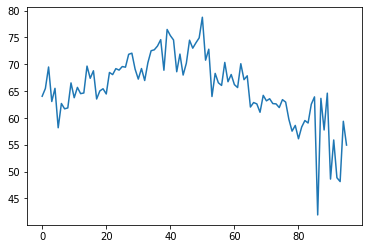

In [64]:
prediction["yhat"].plot()

<ipython-input-65-77218271ec35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Adilabad"][-12:]=prediction["yhat"][-12:]


<AxesSubplot:>

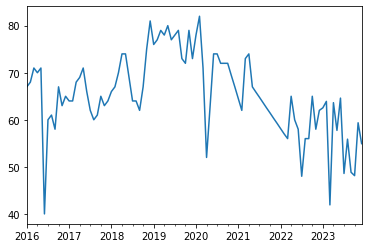

In [65]:
data["Adilabad"][-12:]=prediction["yhat"][-12:]
data["Adilabad"].plot()

# ERROR CALCULATION

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
rmse = round(sqrt(mean_squared_error(dfKN["y"].iloc[-12:], prediction["yhat"].iloc[72:84])),2)
mae = round(mean_absolute_error(dfKN["y"].iloc[-12:], prediction["yhat"].iloc[72:84]),2)
mape = round(mean_absolute_percentage_error(dfKN["y"].iloc[-12:], prediction["yhat"].iloc[72:84]),2)
print(f"RMSE : {rmse}")
print(f"MAE  : {mae}")
print(f"MAPE : {mape*100}%")

RMSE : 4.61
MAE  : 3.81
MAPE : 7.000000000000001%


The mean absolute percentage error is : 7%
Hence our accuracy is : 93%
which is acceptable